# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Awaludin Ahmad Hafiz
- **Email:** hafizawaludinahmad@gmail.com
- **ID Dicoding:** caliose

## Menentukan Pertanyaan Bisnis

- Di musim apa peminjaman sepeda melonjak?
- Bagaimana perbedaan tren peminjaman sepeda pada musim liburan dan hari biasa?
- Bagaimana pengaruh suhu terhadap tren peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

## Data Wrangling

### Gathering Data

* Kita perlu mengekstraksi file yang kita unduh karena masih dalam format '.zip'

In [159]:
local_zip = '/content/sample_data/Bike-sharing-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sample_data')
zip_ref.close()

* Data yang telah diekstrak kemudian kita muat untuk dapat ditampilkan

1. Memuat data hour.csv

In [160]:
hour_df = pd.read_csv("/content/sample_data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


2. Memuat data day.csv

In [161]:
day_df = pd.read_csv("/content/sample_data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

* Selanjutnya data dicek apakah ada missing value atau data yang terduplikasi

1. Pengecekan terhadap data hour_df

In [162]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [163]:
## pengecekan missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [164]:
## pengecekan duplikasi
print("Jumlah duplikasi pada data hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada data hour_df:  0


In [165]:
## pengecekan karakteristik data lebih dalam
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


2. Pengecekan terhadap data day.csv

In [166]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [167]:
## pengecekan missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [168]:
## pengecekan duplikasi data
print("Jumlah duplikasi pada data day_df: ", day_df.duplicated().sum())

Jumlah duplikasi pada data day_df:  0


In [169]:
## pengecekan karakteristik data lebih dalam
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Cleaning Data

1. Merapikan data hour_df

Jika kita membaca data card dataset di atas pada web Kaggle, beberapa nilai numerik pada data sebenarnya mewakili suatu kategori tertentu. Oleh karena itu, kita dapat mengubah beberapa data numerik dan menggantinya dengan data nominal (kategori).

In [170]:
## mengubah tipe data
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['season'] = hour_df.season.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

## mengecek apakah tipe data sudah berubah
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [171]:
## mengubah variabel pada data kategori sesuai representasi yang dijelaskan pada data card
# season : season (1:springer, 2:summer, 3:fall, 4:winter)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# mnth : month ( 1 to 12)
hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','April','May','June','July','Aug','Sep','Oct','Nov','Des'), inplace=True)

# holiday : weather day is holiday or not
hour_df.holiday.replace((0,1), ('Not Holiday','Holiday'), inplace=True)

# weekday : day of the week
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'), inplace=True)

# workingday : if day is neither weekend nor holiday is 1, otherwise is 0
hour_df.workingday.replace((0,1),('No','Yes'), inplace=True)

# weathersit : 1:Clear, 2:Misty, 3:Light Rain, 4:Heavy Rain
hour_df.weathersit.replace((1,2,3,4),('Clear','Misty','Light Rain','Heavy Rain'), inplace=True)

# mengubah data yr menjadi: 0:2011, 1:2012
hour_df.yr.replace((0,1),(2011,2012), inplace=True)

# mengecek hasil perubahan
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Not Holiday,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,Not Holiday,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,Not Holiday,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,Not Holiday,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,Not Holiday,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [172]:
# melakukan normalisasi terhadap nilai temp, hum, dan windspeed sesuai ketentuan pada datacard

hour_df['temp'] = (hour_df['temp'] * 47) + (-8)
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67

In [173]:
## mengubah nama kolom agar lebih mudah dibaca
hour_df.rename(columns={
    "dteday":"date",
    "yr":"year",
    "mnth":"month",
    "hr":"hour",
    "weathersit":"weather",
    "cnt":"count"
}, inplace=True)

2. Merapikan data day_df

Jika kita membaca data card dataset di atas pada web Kaggle, beberapa nilai numerik pada data sebenarnya mewakili suatu kategori tertentu. Oleh karena itu, kita dapat mengubah beberapa data numerik dan menggantinya dengan data nominal (kategori).

In [174]:
## mengubah tipe data
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = day_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

## mengecek apakah tipe data sudah berubah
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [175]:
## mengubah variabel pada data kategori sesuai representasi yang dijelaskan pada data card
# season : season (1:springer, 2:summer, 3:fall, 4:winter)
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# mnth : month ( 1 to 12)
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','April','May','June','July','Aug','Sep','Oct','Nov','Des'), inplace=True)

# holiday : weather day is holiday or not
day_df.holiday.replace((0,1), ('Not Holiday','Holiday'), inplace=True)

# weekday : day of the week
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'), inplace=True)

# workingday : if day is neither weekend nor holiday is 1, otherwise is 0
day_df.workingday.replace((0,1),('No','Yes'), inplace=True)

# weathersit : 1:Clear, 2:Misty, 3:Light Rain, 4:Heavy Rain
day_df.weathersit.replace((1,2,3,4),('Clear','Misty','Light Rain','Heavy Rain'), inplace=True)

# mengubah data yr menjadi: 0:2011, 1:2012
day_df.yr.replace((0,1),(2011,2012), inplace=True)

# mengecek hasil perubahan
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,Not Holiday,Sat,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,Not Holiday,Sun,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,Not Holiday,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,Not Holiday,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,Not Holiday,Wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [176]:
# melakukan normalisasi terhadap nilai temp, hum, dan windspeed sesuai ketentuan pada datacard

day_df['temp'] = (day_df['temp'] * 47) + (-8)
day_df['hum'] = day_df['hum'] * 100
day_df['windspeed'] = day_df['windspeed'] * 67

In [177]:
## mengubah nama kolom agar lebih mudah dibaca
day_df.rename(columns={
    "dteday":"date",
    "yr":"year",
    "mnth":"month",
    "hr":"hour",
    "weathersit":"weather",
    "cnt":"count"
}, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore hour_df

In [178]:
hour_df.describe(include='all')

<ipython-input-178-8c27de8cc91c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include='all')


,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,May,NaN,Not Holiday,Sat,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,15.358397,0.475775,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,NaN,NaN,NaN,NaN,9.050138,0.171850,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,-7.060000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,7.980000,0.333300,48.000000,7.001500,4.000000,34.000000,40.000000


### Explore day_df

In [179]:
day_df.describe(include='all')

<ipython-input-179-a3f85d0fb009>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,Jan,Not Holiday,Sun,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,15.283085,0.474354,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,NaN,NaN,NaN,NaN,8.603397,0.162961,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,-5.220871,0.079070,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,7.842925,0.337842,52.000000,9.041650,315.500000,2497.000000,3152.000000


* Membuat pivot tabel untuk menghitung rata-rata peminjaman di setiap musim



In [180]:
day_df.groupby(by="season").agg({
    "count": "sum",
})

,count
season,
Spring,471348
Summer,918589
Fall,1061129
Winter,841613


* Membuat pivot tabel untuk menghitung tren peminjaman di musim liburan


In [181]:
day_df.groupby(by=["holiday"]).agg({
    "count": "sum"
})

,count
holiday,
Not Holiday,3214244
Holiday,78435


## Visualization & Explanatory Analysis

### Pertanyaan 1: Di musim apa peminjaman sepeda melonjak?

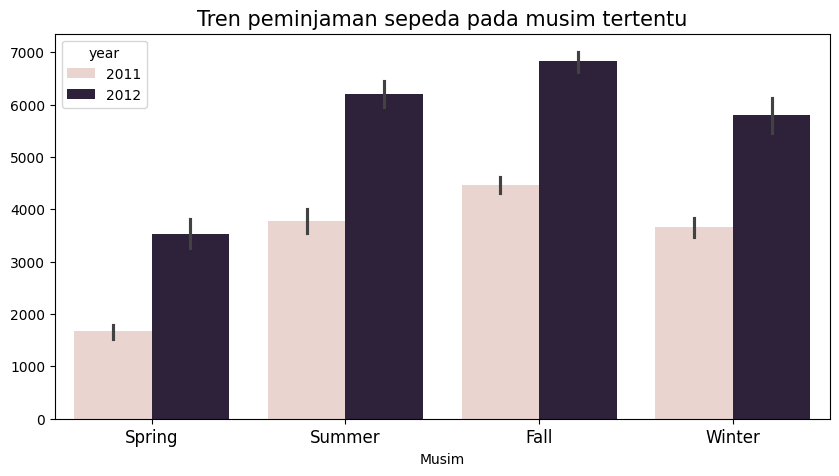

In [182]:
plt.figure(figsize=(10,5))

sns.barplot(
    y="count",
    x="season",
    data=day_df,
    hue="year",
)

plt.title("Tren peminjaman sepeda pada musim tertentu", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Musim")
plt.tick_params(axis='x', labelsize=12)
plt.show()

** Tren peminjaman cenderung naik saat Fall (musim gugur) baik di tahun 2011 maupun 2012.

### Pertanyaan 2: Bagaimana perbedaan tren peminjaman sepeda pada musim liburan dan hari biasa?

([<matplotlib.patches.Wedge at 0x7f6faf991000>,
 [Text(-1.0969211980352616, 0.08224284346304542, 'Not Holiday'),
  Text(1.1966412990724196, -0.08971957063134176, 'Holiday')],
 [Text(-0.5983206534737789, 0.044859732798024764, '97.6%'),
  Text(0.6980407577922446, -0.05233641620161602, '2.4%')])

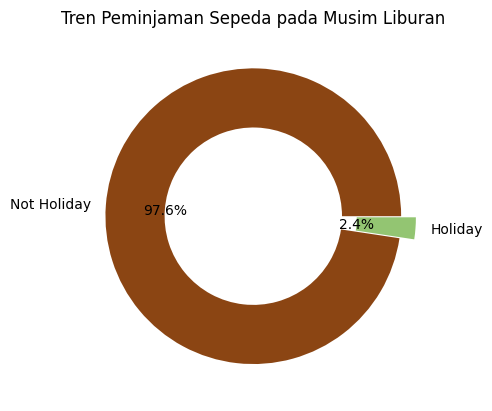

In [183]:
byholiday_df = day_df.groupby(by=["holiday"]).agg({
    "count": "sum"
    })

condition = ("Not Holiday", "Holiday")
counts = (3214244, 78435)
explode = (0, 0.1)

plt.title("Tren Peminjaman Sepeda pada Musim Liburan")
plt.pie(
    x=counts,
    labels=condition,
    autopct='%1.1f%%',
    colors=('#8B4513', '#93C572'),
    explode=explode,
    wedgeprops={'width':0.4}
)

** Permintaan peminjaman sepeda lebih banyak saat hari biasa.

### Pertanyaan 3: Bagaimana pengaruh suhu terhadap tren peminjaman sepeda?

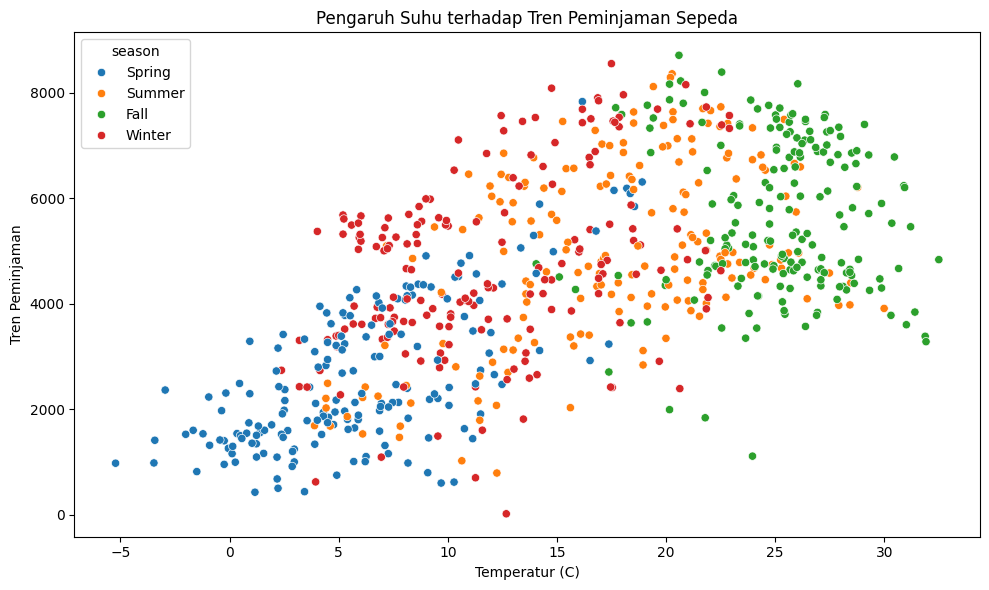

In [184]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='count', data=day_df, hue='season')

plt.xlabel("Temperatur (C)")
plt.ylabel("Tren Peminjaman")
plt.title("Pengaruh Suhu terhadap Tren Peminjaman Sepeda")
plt.tight_layout()
plt.show()

** Tren peminjaman naik seiring kenaikan suhu.

## Conclusion

- Conclution pertanyaan 1: Di musim apa peminjaman sepeda melonjak?

    Berdasarkan pada visualisasi data yang disajikan, tren peminjaman sepeda melonjak saat musim gugur dengan penggunaan hingga mencapai lebih dari 4.000 di tahun 2011 dan hampir 7000 di tahun 2012. Rekor ini melebihi penggunaan pada musim lainnya di tahun yang sama. Dengan begitu, dapat disimpulkan bahwa penambahan unit, pemberian promo, dan strategi pemasaran lainnya akan sangat signifikan di musim-musim tertentu.

- Conclution pertanyaan 2: Bagaimana perbedaan tren peminjaman sepeda pada musim liburan dan hari biasa?

  Dari diagram lingkaran yang disajikan, teramati bahwa tren peminjaman sangat banyak terjadi saat di hari biasa. Hal ini mungkin dipengaruhi oleh keadaan yang menjadikan sepeda sebagai komoditas utama sehingga banyak digunakan untuk mendukung kegiatan sehari-hari. Oleh karena itu, kita dapat simpulkan bahwa penting untuk mengurangi unit di musim liburan sehingga kita dapat mengurangi biaya perawatan.

- Conclution pertanyaan 3: Bagaimana pengaruh suhu terhadap tren peminjaman sepeda?

    Berdasarkan data yang disajikan, terlihat bahwa tren peminjaman cenderung naik seiring kenaikan suhu. Hal ini dapat diakibatkan kesulitannya mobilisasi di suhu dingin dan sangat panas sehingga orang-orang lebih memilih untuk di rumah. Dengan begitu, kita dapat meningkatkan pengalaman pengguna dengan menambahkan fitur-fitur pendukung di suhu-suhu tertentu, seperti jaket, topi, dan lain sebagainya.

In [185]:
day_df.to_csv("day_data.csv", index=False)